In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

 Neural Network Architecture

In [2]:
def relu(x):
    return np.maximum(0, x)


def relu_derivative(x):
    return (x >= 0).astype(float)


def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)


def cross_entropy(x, y):
    N = x.shape[0]
    ce = -np.sum(y * np.log(x + 1e-9)) / N
    return ce


def cross_entropy_derivative(x, y):
    return x - y


def create_batches(X, y, batch_size):
    m = X.shape[0]
    batches = []
    permutation = np.random.permutation(m)
    X_shuffled = X[permutation]
    y_shuffled = y[permutation]
    num_complete_batches = m // batch_size
    for k in range(num_complete_batches):
        batch_X = X_shuffled[k * batch_size: k * batch_size + batch_size]
        batch_y = y_shuffled[k * batch_size: k * batch_size + batch_size]
        batch = (batch_X, batch_y)
        batches.append(batch)
    if m % batch_size != 0:
        batch_X = X_shuffled[num_complete_batches * batch_size:]
        batch_y = y_shuffled[num_complete_batches * batch_size:]
        batch = (batch_X, batch_y)
        batches.append(batch)
    return batches


class LabNeuralNetwork:
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.W_1 = np.random.randn(input_nodes, hidden_nodes) * np.sqrt(2. / input_nodes)
        self.b_1 = np.zeros((1, hidden_nodes))
        self.W_2 = np.random.randn(hidden_nodes, output_nodes) * np.sqrt(2. / hidden_nodes)
        self.b_2 = np.zeros((1, output_nodes))
        self.learning_rate = learning_rate

    def forward(self, x):
        self.t_1 = np.dot(x, self.W_1) + self.b_1
        self.h_1 = relu(self.t_1)
        self.t_2 = np.dot(self.h_1, self.W_2) + self.b_2
        self.z = softmax(self.t_2)
        return self.z

    def backward(self, x, y):
        m = x.shape[0]
        dE_dt2 = cross_entropy_derivative(self.z, y)
        dE_dW2 = (1 / m) * np.dot(self.h_1.T, dE_dt2)
        dE_db2 = (1 / m) * np.sum(dE_dt2, axis=0, keepdims=True)
        dE_dh1 = np.dot(dE_dt2, self.W_2.T)
        dE_dt1 = dE_dh1 * relu_derivative(self.t_1)
        dE_dW1 = (1 / m) * np.dot(x.T, dE_dt1)
        dE_db1 = (1 / m) * np.sum(dE_dt1, axis=0, keepdims=True)
        self.W_2 -= self.learning_rate * dE_dW2
        self.b_2 -= self.learning_rate * dE_db2
        self.W_1 -= self.learning_rate * dE_dW1
        self.b_1 -= self.learning_rate * dE_db1

    def train(self, x, y, epochs_number, batch_size):
        loss_arr = []
        for epoch in range(epochs_number):
            start_time = time.time()
            batches = create_batches(x, y, batch_size)
            for batch_X, batch_y in batches:
                predictions = self.forward(batch_X)
                loss = cross_entropy(predictions, batch_y)
                loss_arr.append(loss)
                self.backward(batch_X, batch_y)

            epoch_time = time.time() - start_time
            print(f"Epoch {epoch + 1}/{epochs_number}, Loss: {loss:.4f}, Time: {epoch_time:.2f} seconds")

        plt.plot(loss_arr)
        plt.title("Loss function")
        plt.show()

Load MNIST from Tensorflow

In [3]:
from tensorflow.keras import datasets
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

Display and validating data

Train data

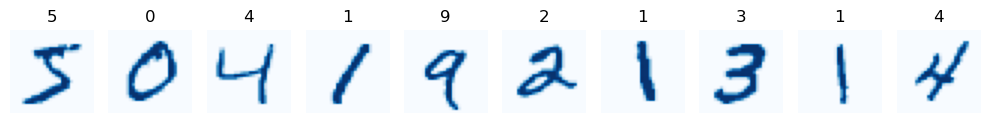

In [4]:
fig, axes = plt.subplots(1, 10, figsize=(10, 5))
for ax, image, label in zip(axes, x_train, y_train):
    ax.set_title(label)
    ax.imshow(image, cmap="Blues")
    ax.axis("off")
plt.tight_layout()
plt.show()

Test data

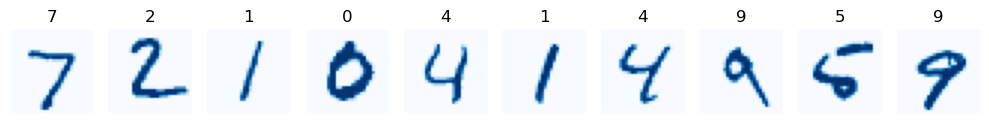

In [5]:
fig, axes = plt.subplots(1, 10, figsize=(10, 5))
for ax, image, label in zip(axes, x_test, y_test):
    ax.set_title(label)
    ax.imshow(image, cmap="Blues")
    ax.axis("off")
plt.tight_layout()
plt.show()

Dimension validation

In [6]:
print(f"Dimension x_train: {x_train.shape}")
print(f"Dimension y_train: {y_train.shape}")
print(f"Dimension x_test: {x_test.shape}")
print(f"Dimension y_test: {y_test.shape}")

Dimension x_train: (60000, 28, 28)
Dimension y_train: (60000,)
Dimension x_test: (10000, 28, 28)
Dimension y_test: (10000,)


Define Hyper parameterizes

In [7]:
MNIST_INPUT_NODES_SIZE = 28 * 28
HIDDEN_NEURONS_NUMBER = 300
MNIST_OUTPUT_NODES_SIZE = 10
MNIST_LEARNING_RATE = 0.1
EPOCHS = 20
BATCH_SIZE = 64

Data preprocessing. Flattening

In [8]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train_flatten = x_train.reshape(x_train.shape[0], -1)
x_test_flatten = x_test.reshape(x_test.shape[0], -1)
y_train_onehot_encoding = np.eye(MNIST_OUTPUT_NODES_SIZE)[y_train]
y_test_onehot_encoding = np.eye(MNIST_OUTPUT_NODES_SIZE)[y_test]

Train

Epoch 1/20, Loss: 0.2468, Time: 1.83 seconds
Epoch 2/20, Loss: 0.0433, Time: 1.69 seconds
Epoch 3/20, Loss: 0.1246, Time: 1.63 seconds
Epoch 4/20, Loss: 0.2152, Time: 1.61 seconds
Epoch 5/20, Loss: 0.0678, Time: 1.72 seconds
Epoch 6/20, Loss: 0.0319, Time: 1.81 seconds
Epoch 7/20, Loss: 0.0791, Time: 1.66 seconds
Epoch 8/20, Loss: 0.1909, Time: 1.75 seconds
Epoch 9/20, Loss: 0.1578, Time: 1.77 seconds
Epoch 10/20, Loss: 0.0429, Time: 1.68 seconds
Epoch 11/20, Loss: 0.0258, Time: 1.73 seconds
Epoch 12/20, Loss: 0.0210, Time: 1.70 seconds
Epoch 13/20, Loss: 0.0070, Time: 1.64 seconds
Epoch 14/20, Loss: 0.0521, Time: 1.82 seconds
Epoch 15/20, Loss: 0.0106, Time: 1.96 seconds
Epoch 16/20, Loss: 0.1390, Time: 1.79 seconds
Epoch 17/20, Loss: 0.0429, Time: 1.75 seconds
Epoch 18/20, Loss: 0.0108, Time: 1.69 seconds
Epoch 19/20, Loss: 0.0146, Time: 1.71 seconds
Epoch 20/20, Loss: 0.0040, Time: 1.72 seconds


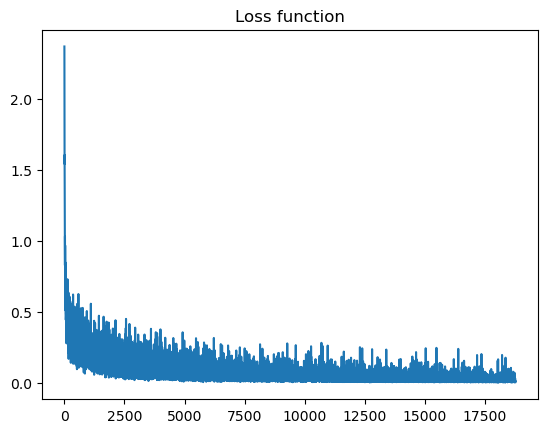

In [9]:
nn_model = LabNeuralNetwork(input_nodes=MNIST_INPUT_NODES_SIZE,
                            hidden_nodes=HIDDEN_NEURONS_NUMBER,
                            output_nodes=MNIST_OUTPUT_NODES_SIZE,
                            learning_rate=MNIST_LEARNING_RATE)
nn_model.train(x_train_flatten, y_train_onehot_encoding, EPOCHS, BATCH_SIZE)

Test

In [10]:
predictions = nn_model.forward(x_test_flatten)
predicted_labels = np.argmax(predictions, axis=1)
accuracy = np.mean(predicted_labels == y_test) * 100
print(f"Accuracy on test data: {accuracy:.2f}%")

Accuracy on test data: 97.95%
